# Analisi dei risultati dell'esperimento
L'esperimento presenta in output due file csv. Uno quando viene utilizzato l'algoritmo DRR e uno quando viene utilizzato FCFS. Il notebook ha come obiettivo quello di effettuare delle analisi statistiche per comparare le prestazioni dei due algoritmi.

## Preparazione dei dati
Prima di tutto, i 2 CSV vengono concantenati in un unico data frame.

In [2]:
import pandas as pd
import numpy as np

n_request = 5000
df1 = pd.read_csv("fcfs.csv")
df2 = pd.read_csv("drr.csv")

df = pd.concat([df1, df2])

## Analisi tempo di attesa richieste lente

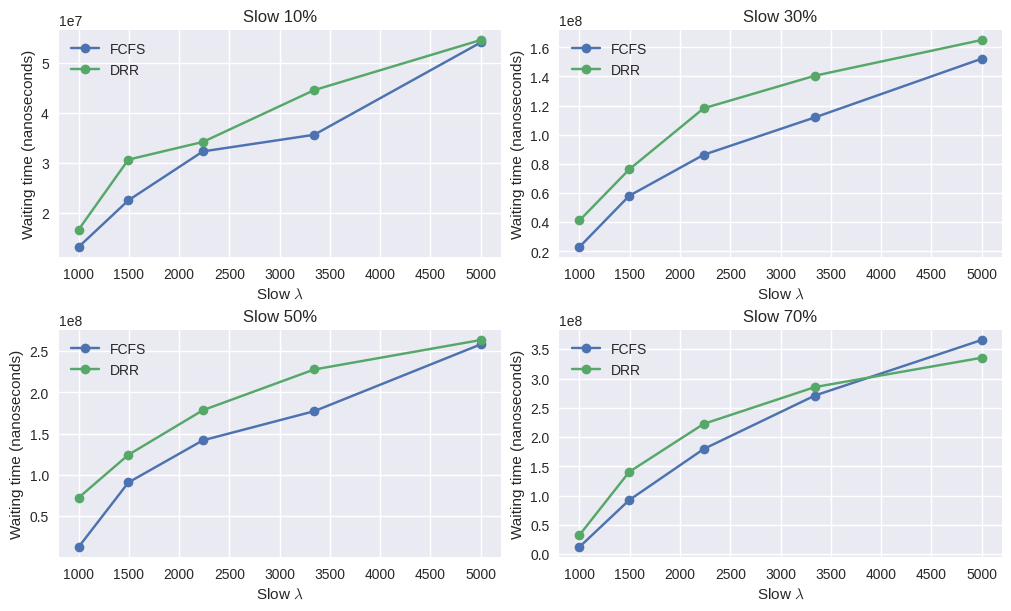

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

p = df.pivot_table(columns="sched", index=["slow_load", "slow_rate"], values="avg_slow_wt")

offset = 5

plt.style.use("seaborn")

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), constrained_layout=True)

for (ax, i) in zip(axs.flat, range(0, len(p.index.get_level_values(1)), 5)):
    percent = p.index.get_level_values(0)[i:i+offset][0]
    ax.set_title(f'Slow {percent}%')
    ax.plot(p.index.get_level_values(1)[i:i+offset], p["fcfs"][i:i+offset], label="FCFS", marker="o")
    ax.plot(p.index.get_level_values(1)[i:i+offset], p["drr"][i:i+offset], label="DRR", marker="o")
    ax.set_xlabel(r"Slow $\lambda$")
    ax.set_ylabel(r"Waiting time (nanoseconds)")
    ax.legend()